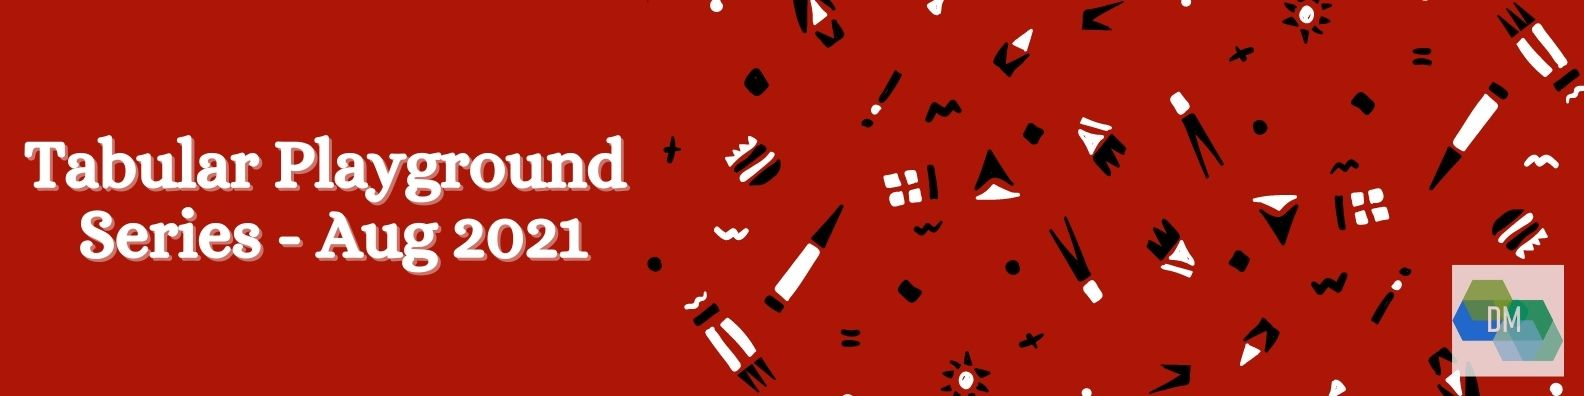

<blockquote>📌This TPS dataset has 100 features i.e f0 to f99. 
    The target variable 'loss' ranges from 0 to 42 i.e. 43 unique values in the outcome column.
    The train dataset contains 250000 rows with 102 columns and test dataset contains 150000 rows with 101 columns.<blockquote>

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
df_train= pd.read_csv("../input/tabular-playground-series-aug-2021/train.csv")
df_test= pd.read_csv("../input/tabular-playground-series-aug-2021/test.csv")
df_subm= pd.read_csv("../input/tabular-playground-series-aug-2021/sample_submission.csv")

In [ ]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

In [ ]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

In [ ]:
df_train.head()

In [ ]:
df_train.describe().T

In [ ]:
df_train.info()

In [ ]:
df_test.describe().T

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [ ]:
df_train.isna().sum()

In [ ]:
df_test.isna().sum()

In [ ]:
print ("Unique values are:\n",df_train.nunique())

In [ ]:
sns.distplot(df_train['loss'])

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(data = df_train, x ='loss',palette='icefire');

In [ ]:
plt.figure(figsize=(11,11))
corr=df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='twilight_r', robust=True, center=0,square=True, linewidths=.6)
plt.title('Correlation')
plt.show()

In [ ]:
# Finding correlations 
correlations_data = df_train.corr()['loss'].sort_values()
print(correlations_data.head(20),'\n')
print(correlations_data.tail(20),'\n')

In [ ]:
corr_loss = df_train.corr()
plt.figure(figsize=(24,8))
corr_loss["loss"][:-1].plot(kind="bar",grid=True)
plt.title("Features correlation")

In [ ]:
df_train.drop(columns = 'id', inplace = True)
df_test.drop(columns = 'id', inplace = True)

In [ ]:
#fig = plt.figure(figsize = (12,45))
#for i in range(len(df_train.columns.tolist()[:100])):
    #plt.subplot(25,4,i+1)
    #plt.title(df_train.columns.tolist()[:100][i])
    #a = sns.kdeplot(df_train[df_train.columns.tolist()[:100][i]])
#plt.tight_layout()
#plt.show()

In [ ]:
df = pd.concat([df_train.drop(["loss"], axis=1)])
df = df_train.columns[0:100]
plt.subplots(figsize=(20,160))
length = len(df)
for i, j in zip(df, range(length)):
    fig = plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.25, hspace=.6)
    plt.yticks([])
    sns.histplot(x=df_train[i], alpha=0.5,edgecolor="black",color='#3e3b92')
    sns.histplot(x=df_test[i], alpha=0.5,edgecolor="black",color='#00ee6e')
    fig.legend(labels=('Train','Test'))

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Dataset split ⏳  </centre></strong></h3>

In [ ]:
# define dataset
X = df_train.drop('loss', axis=1)
y = df_train['loss']

In [ ]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>CatBoost ✏️ </centre></strong></h3>

In [ ]:
from catboost import CatBoostRegressor
model1 = CatBoostRegressor(random_state=42,iterations = 5000,learning_rate=0.005,
                           early_stopping_rounds=50,task_type="GPU")
model1.fit(X,y, verbose=0)

In [ ]:
from sklearn import metrics
predicted1 = model1.predict(X)

mae = metrics.mean_absolute_error(y, predicted1)
mse = metrics.mean_squared_error(y, predicted1)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y,predicted1)
print("CatBoost Metrics:")
print("mae:",mae)
print("mse:", mse)
print("rmse:", rmse)
print("r2:", r2)

In [ ]:
y_pred1 = model1.predict(df_test)

In [ ]:
import shap
explainer = shap.Explainer(model1)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values,max_display=20)

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>LightGBM ✏️ </centre></strong></h3>

In [ ]:
from lightgbm import LGBMRegressor
model2 = LGBMRegressor(random_state=42,n_estimators= 500,learning_rate=0.005,
                       objective='regression', max_depth=5, n_jobs = -1)
model2.fit(X,y, verbose=1)

In [ ]:
from sklearn import metrics
predicted2 = model2.predict(X)

mae = metrics.mean_absolute_error(y, predicted2)
mse = metrics.mean_squared_error(y, predicted2)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y,predicted2)

print("LightGBM Metrics:")
print("mae:",mae)
print("mse:", mse)
print("rmse:", rmse)
print("r2:", r2)

In [ ]:
y_pred2 = model2.predict(df_test)

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>XGBoost ✏️ </centre></strong></h3>

In [ ]:
from xgboost import XGBRegressor
model3 = XGBRegressor(random_state=42,n_estimators= 500,learning_rate=0.05,
                      max_depth=8,booster='gbtree',verbosity=0,tree_method = 'gpu_hist',task_type="GPU")
model3.fit(X,y)

In [ ]:
from sklearn import metrics
predicted3 = model3.predict(X)

mae = metrics.mean_absolute_error(y, predicted3)
mse = metrics.mean_squared_error(y, predicted3)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y,predicted3)

print("XGBoost Metrics:")
print("mae:",mae)
print("mse:", mse)
print("rmse:", rmse)
print("r2:", r2)

In [ ]:
y_pred3 = model3.predict(df_test)

In [ ]:
ensembled = y_pred1*0.5 + y_pred2*0.25 + y_pred3*0.25 

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>StackingCVRegressor ✏️ </centre></strong></h3>

More information about StackingCVRegressor: https://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/

In [ ]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,random_state=42)
regr_models = (model1,model2,model3)
model_stack = StackingCVRegressor(regressors=regr_models, meta_regressor=model1, 
                            use_features_in_secondary=True,shuffle=False,cv=kfold,random_state=42)
model_stack.fit(X, y)

In [ ]:
predicted_st = model_stack.predict(X)
from sklearn import metrics

mae = metrics.mean_absolute_error(y, predicted_st)
mse = metrics.mean_squared_error(y, predicted_st)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y,predicted_st)

print("mae:",mae)
print("mse:", mse)
print("rmse:", rmse)
print("r2:", r2)

In [ ]:
y_pred_stack = model_stack.predict(df_test)

In [ ]:
df_subm['loss'] = y_pred_stack
df_subm

In [ ]:
df_subm.to_csv('submission.csv', index=False)

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>If you found this notebook useful, please Upvote. Thanks! </centre></strong></h3>